# Artificial Neural Networks in TensorFlow

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

In [3]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

<Figure size 200x200 with 0 Axes>

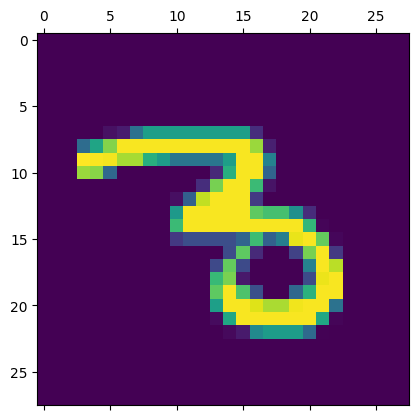

Value inside the image is 3


In [18]:
sample = 30
plt.figure(figsize=(2, 2))
plt.matshow(x_train[sample]);
plt.show();
print(f"Value inside the image is {y_train[sample]}");

In [6]:
X_train = x_train.reshape(len(x_train), 28*28)/255

In [7]:
x_test.shape

(10000, 28, 28)

In [8]:
X_test = x_test.reshape(len(x_test), 28*28)/255

## Vanilla Model with no Layers

In [10]:
model = keras.Sequential([
    # reshape the input already or, flatter inside the sequential method
    # keras.layers.Flatten(input_shape=(28, 28))
    keras.layers.Dense(10, input_shape=(784, ), activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# Example usage (replace X_train and y_train with actual data):


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 10)                  │           7,850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8098 - loss: 0.7218
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9141 - loss: 0.3066
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9220 - loss: 0.2834
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9243 - loss: 0.2705
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9251 - loss: 0.2681


In [12]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9126 - loss: 0.3068


[0.26948797702789307, 0.9246000051498413]

In [13]:
pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step  


```python
np.argmax(i) # where i is a list, returns the index of the maximum value in the list
```

In [14]:
pred_vals = [np.argmax(i) for i in pred]
conf_mat = tf.math.confusion_matrix(labels = y_test, predictions=pred_vals)

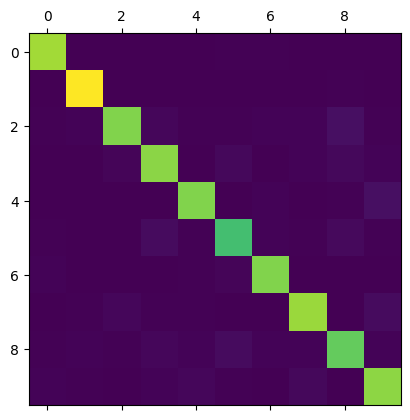

tf.Tensor(
[[ 963    0    0    2    0    6    5    2    1    1]
 [   0 1119    2    2    0    1    4    2    5    0]
 [   6   11  908   21    8    5   12   10   45    6]
 [   2    0   14  924    0   25    2   11   22   10]
 [   1    2    4    1  906    0   10    4    8   46]
 [   7    3    2   34    8  784   12    5   29    8]
 [  13    3    4    2    8   15  909    2    2    0]
 [   1    8   19    6    6    1    0  950    3   34]
 [   5   12    5   21    9   33    9   13  856   11]
 [  10    7    1    9   21    7    0   23    4  927]], shape=(10, 10), dtype=int32)


In [15]:
plt.matshow(conf_mat)
plt.show()
print(conf_mat)

## Model with layers

In [16]:
model0 = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(784,)),  # Hidden layer with 128 neurons
    keras.layers.Dense(64, activation='relu'),                      # Another hidden layer with 64 neurons
    keras.layers.Dense(10, activation='softmax')                    # Output layer with 10 neurons for classification
])
model0.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy']
             )
model0.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model0.fit(X_train, y_train, epochs=15)

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8788 - loss: 0.4213
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9669 - loss: 0.1116
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9765 - loss: 0.0714
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9842 - loss: 0.0520 
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9878 - loss: 0.0383
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9894 - loss: 0.0319
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9915 - loss: 0.0261
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9926 - loss: 0.0218
Epoch 9/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9932 - loss: 0.0192
Epoch 10/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9937 - loss: 0.0176
Epoch 11/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9948 - loss: 0.0148
Epoch 12/15
1875/1875 ━━━━

# Convolutional Neural Networks in TensorFlow

Dataset = https://www.cs.toronto.edu/%7Ekriz/cifar.html

In [19]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [20]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [21]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

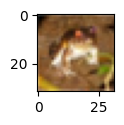

The image shown here is frog


In [22]:
plt.figure(figsize=(1, 1))
plt.imshow(x_train[0])
plt.show()
print("The image shown here is " + color.BOLD + f"{labels[y_train[0][0]]}" + color.END)

In [23]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [24]:
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

In [25]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [26]:
x_train = x_train/255
x_test = x_test/255

## Vanilla ANN Model

In [28]:
model1 = keras.Sequential([
    keras.layers.Flatten(input_shape = (32, 32, 3)),
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model1.compile(optimizer = 'SGD',
              loss = "sparse_categorical_crossentropy",
              metrics = ['accuracy']
              )
model1.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 3000)                │       9,219,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1000)                │       3,001,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 10)                  │          10,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,230,010 (46.65 MB)

 Trainable params: 12,230,010 (46.65 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
model1.fit(x_test, y_test, epochs=5)

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 55ms/step - accuracy: 0.2227 - loss: 2.1249
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 59ms/step - accuracy: 0.3566 - loss: 1.8267
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 58ms/step - accuracy: 0.3790 - loss: 1.7561
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 64ms/step - accuracy: 0.4087 - loss: 1.6878
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 56ms/step - accuracy: 0.4313 - loss: 1.6234


In [30]:
from sklearn.metrics import confusion_matrix, classification_report

In [31]:
y_pred = model1.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step


In [32]:
y_pred = [np.argmax(i) for i in y_pred]

In [33]:
print( color.BOLD + 23*" " +  "Classification Report \n" + 30*"--"+ color.END + '\n', classification_report(y_test, y_pred))

                       Classification Report 
------------------------------------------------------------
               precision    recall  f1-score   support

           0       0.47      0.58      0.52      1000
           1       0.36      0.77      0.49      1000
           2       0.45      0.16      0.23      1000
           3       0.35      0.33      0.34      1000
           4       0.52      0.31      0.39      1000
           5       0.44      0.37      0.40      1000
           6       0.48      0.54      0.51      1000
           7       0.65      0.33      0.44      1000
           8       0.69      0.37      0.48      1000
           9       0.37      0.65      0.47      1000

    accuracy                           0.44     10000
   macro avg       0.48      0.44      0.43     10000
weighted avg       0.48      0.44      0.43     10000



## CNN Model

In [34]:
cnn = keras.Sequential([
    # Conv Layer
    keras.layers.Conv2D(filters = 64, kernel_size=(3, 3), activation='relu', input_shape = (32, 32, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(filters = 32, kernel_size=(3, 3), activation='relu', input_shape = (32, 32, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    # Dense Network
    keras.layers.Flatten(input_shape = (32, 32, 3)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
cnn.compile(optimizer = 'adam',
              loss = "sparse_categorical_crossentropy",
              metrics = ['accuracy']
              )
cnn.summary();

C:\Users\dbala\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\dbala\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 100)                 │         115,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 64)                  │           6,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 142,670 (557.30 KB)

 Trainable params: 142,670 (557.30 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
cnn.fit(x_test, y_test, epochs = 10)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.2175 - loss: 2.0813
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.4216 - loss: 1.5863
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.4876 - loss: 1.4123
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.5202 - loss: 1.3178
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.5732 - loss: 1.2152
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.6005 - loss: 1.1179
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.6308 - loss: 1.0390
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.6574 - loss: 0.9670
Epoch 9/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.6864 - loss: 0.9085
Epoch 10/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.7060 - loss: 0.8468


In [36]:
cnn.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.7425 - loss: 0.7354


[0.7302146553993225, 0.744700014591217]

In [37]:
def plot_sample(x, y, index):
    plt.figure(figsize=(2, 2))
    plt.title(labels[y[index]])
    plt.imshow(x[index])
    plt.show()


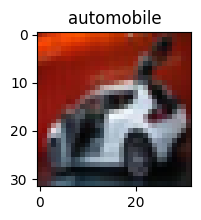

In [38]:
plot_sample(x_test, y_test, 6)

In [39]:
def plot_pred_sample(x, y, y_p, index):
    plt.figure(figsize=(2, 2))
    plt.title(labels[y[index]])
    plt.imshow(x[index])
    plt.show()
    print(color.BOLD + color.PURPLE + 13*" " +  labels[y_p[index]] + color.END)

In [40]:
y_pred = cnn.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


In [41]:
y_pred = [np.argmax(i) for i in y_pred]

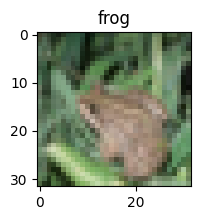

             deer


In [42]:
plot_pred_sample(x_test, y_test, y_pred, 4)

In [43]:
print( color.BOLD + 23*" " +  "Classification Report \n" + 30*"--"+ color.END + '\n', classification_report(y_test, y_pred))

                       Classification Report 
------------------------------------------------------------
               precision    recall  f1-score   support

           0       0.78      0.83      0.80      1000
           1       0.88      0.88      0.88      1000
           2       0.71      0.50      0.59      1000
           3       0.67      0.51      0.58      1000
           4       0.62      0.73      0.67      1000
           5       0.60      0.75      0.67      1000
           6       0.83      0.79      0.81      1000
           7       0.69      0.86      0.77      1000
           8       0.87      0.82      0.85      1000
           9       0.88      0.75      0.81      1000

    accuracy                           0.74     10000
   macro avg       0.75      0.74      0.74     10000
weighted avg       0.75      0.74      0.74     10000



## Model for MNIST Dataset using CNN

In [44]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [45]:
x_train.shape

(60000, 28, 28)

<Figure size 200x200 with 0 Axes>

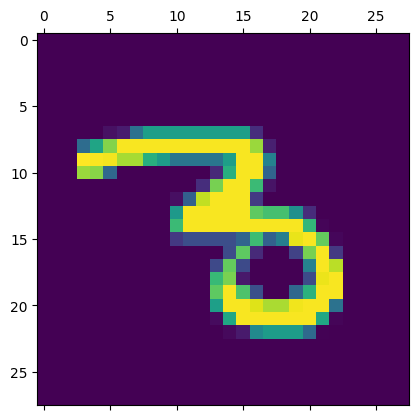

Value inside the image is 3


In [46]:
sample = 30
plt.figure(figsize=(2, 2))
plt.matshow(x_train[sample]);
plt.show();
print(f"Value inside the image is {y_train[sample]}");

In [47]:
X_train = x_train.reshape(len(x_train), 28*28)/255

In [48]:
x_test.shape

(10000, 28, 28)

In [49]:
X_test = x_test.reshape(len(x_test), 28*28)/255

In [60]:
cnn_mnist = keras.Sequential([
    # Conv Layer
    keras.layers.Conv1D(filters = 32, kernel_size=(3, ), activation='relu', input_shape = (28, 28)),
    keras.layers.MaxPooling1D((2,)),
    keras.layers.Conv1D(filters = 16, kernel_size=(3, ), activation='relu'),
    keras.layers.MaxPooling1D((2,)),
    # Dense Network
    keras.layers.Flatten(input_shape = (32, 32, 3)),
    keras.layers.Dense(120, activation='relu'),
    keras.layers.Dense(60, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
cnn_mnist.compile(optimizer = 'adam',
              loss = "sparse_categorical_crossentropy",
              metrics = ['accuracy']
              )
cnn_mnist.summary();

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_8 (Conv1D)                    │ (None, 26, 32)              │           2,720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_7 (MaxPooling1D)       │ (None, 13, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_9 (Conv1D)                    │ (None, 11, 16)              │           1,552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_8 (MaxPooling1D)       │ (None, 5, 16)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 80)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 120)                 │           9,720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 60)                  │           7,260 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 10)                  │             610 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,862 (85.40 KB)

 Trainable params: 21,862 (85.40 KB)

 Non-trainable params: 0 (0.00 B)

In [61]:
cnn_mnist.fit(x_train, y_train, epochs = 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7232 - loss: 2.8949 
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.9412 - loss: 0.2039
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9609 - loss: 0.1289
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9706 - loss: 0.0976
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9744 - loss: 0.0836
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9773 - loss: 0.0756
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9792 - loss: 0.0679
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9811 - loss: 0.0615
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9825 - loss: 0.0558
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9829 - loss: 0.0539
